# A baseline ML models for comparison

## 1. Load the data

In [1]:
# Determine which data to load. Set to True to load the data. PICK ONLY ONE

ML_DATASET_LOAD = False
DNN_DATASET_LOAD = True

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
dataset_path = "../datasets/Edge-IIoT/"

if ML_DATASET_LOAD:
    df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.pkl")   
else:
    df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.pkl")

In [4]:
# Show the first 5 rows of the dataset
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [5]:
# Show the different attack labels
print(df['Attack_type'].value_counts())

# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64

Dataframe shape: (2219201, 63)


### Data Preparation - Drop data (Columns, duplicated rows, NAN, Null..)

In [6]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

# Compute the number of missing values (NaN or null) in each column of a pandas DataFrame object named df. If any of them are non-zero, assert an error.
assert df.isnull().sum().sum() == 0


In [7]:
# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

# Show the first 5 rows of the dataset
df.head()


Dataframe shape: (1909671, 48)


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
1509766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1412910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
1742684,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_HTTP
1990518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_UDP
1548015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909671 entries, 1509766 to 1886405
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 

### Step 4 : Categorical data encoding (Dummy Encoding):

EG. Takes a product category and converts it to a binary vector
```
   customer_id product_category  apparel  books  electronics
0            1     electronics        0      0            1
1            2          apparel       1      0            0
2            3            books       0      1            0
3            4     electronics        0      0            1
4            5          apparel       1      0            0
```



In [9]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

Grab the Attack type and attack label

In [10]:
# Creating a dictionary of Types
attacks = {'Normal': 0 ,'Backdoor' :1, 'DDoS_HTTP':2,  'DDoS_ICMP':3, 'DDoS_TCP':4, 'DDoS_UDP':5, 
           'Fingerprinting':6, 'MITM':7, 'Password':8, 'Port_Scanning':9, 'Ransomware':10, 
           'SQL_injection':11, 'Uploading':12, 'Vulnerability_scanner':13, 'XSS':14}

df['Attack_type'] = df['Attack_type'].map(attacks)


In [11]:
# Save the attack type and attack label
attack_type = df.pop('Attack_type')
attack_label = df.pop('Attack_label')

In [12]:
#print out mapping of attack types values dictionary to descriptions
# Get the count of each attack type
attack_counts = attack_type.map({v: k for k, v in attacks.items()}).value_counts()

for attack, code in attacks.items():
    count = attack_counts[attack] if attack in attack_counts else 0
    print(f'{code} - {attack} \t\t\t- {count}')


0 - Normal 			- 1363998
1 - Backdoor 			- 24026
2 - DDoS_HTTP 			- 48544
3 - DDoS_ICMP 			- 67939
4 - DDoS_TCP 			- 50062
5 - DDoS_UDP 			- 121567
6 - Fingerprinting 			- 853
7 - MITM 			- 358
8 - Password 			- 49933
9 - Port_Scanning 			- 19977
10 - Ransomware 			- 9689
11 - SQL_injection 			- 50826
12 - Uploading 			- 36807
13 - Vulnerability_scanner 			- 50026
14 - XSS 			- 15066


Scaling of features

In [13]:
# Scaling of features to fit within defined range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaled_features = StandardScaler().fit_transform(df.values)

# Label Preprocessing
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# label_n = le.fit_transform(attack_type.values)

label_n = attack_type.values


In [14]:
# Test / train split
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
print ("Train:", X_train.shape, y_train.shape)
print ("Test:", X_test.shape, y_test.shape)

Train: (1527736, 95) (1527736,)
Test: (381935, 95) (381935,)


Show the size of the Train/Test counts for the different attack types
These outputs should match Table 11 in the paper (for ML dataset)

In [15]:
# In the X_train data, count the number attacks of each type
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

# Do the same for the test data
unique, counts = np.unique(y_test, return_counts=True)
print("Test: ", dict(zip(unique, counts)))

Train:  {0: 1091198, 1: 19221, 2: 38835, 3: 54351, 4: 40050, 5: 97253, 6: 682, 7: 286, 8: 39946, 9: 15982, 10: 7751, 11: 40661, 12: 29446, 13: 40021, 14: 12053}
Test:  {0: 272800, 1: 4805, 2: 9709, 3: 13588, 4: 10012, 5: 24314, 6: 171, 7: 72, 8: 9987, 9: 3995, 10: 1938, 11: 10165, 12: 7361, 13: 10005, 14: 3013}


In [16]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1527736, 95)
(381935, 95)
(1527736,)
(381935,)


We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

CPU times: total: 8.38 s
Wall time: 8.37 s


DecisionTreeClassifier()

In [19]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of DT Model::", dt_score)

Accuracy of DT Model:: 0.9805045361121657


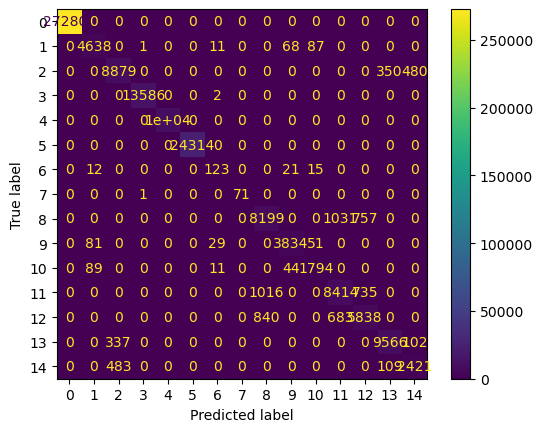

In [20]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9111563930963862, 0.9114575688952016, 0.911291372521317, None)
Micro: (0.9805045361121657, 0.9805045361121657, 0.9805045361121657, None)
Weighted: (0.9805044128589355, 0.9805045361121657, 0.9805037837117491, None)
Per-label: (array([1.        , 0.96224066, 0.9154552 , 0.99985281, 1.        ,
       1.        , 0.69886364, 1.        , 0.81541522, 0.96647341,
       0.92141757, 0.83076619, 0.79645293, 0.95421446, 0.80619381]), array([1.        , 0.96524454, 0.91451231, 0.99985281, 1.        ,
       1.        , 0.71929825, 0.98611111, 0.82096726, 0.95969962,
       0.92569659, 0.82774225, 0.79309876, 0.95612194, 0.80351809]), array([1.        , 0.96374026, 0.91498351, 0.99985281, 1.        ,
       1.        , 0.70893372, 0.99300699, 0.81818182, 0.9630746 ,
       0.92355212, 0.82925147, 0.79477231, 0.95516725, 0.80485372]), array([272800,   4805,   9709,  13588,  10012,  24314,    171,     72,
         9987,   3995,   1938,  10165,   7361,  10005,   3013],
      dtype=int64))


In [22]:
print(confusion_matrix(y_test, dt_predictions))

[[272800      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0   4638      0      1      0      0     11      0      0     68
      87      0      0      0      0]
 [     0      0   8879      0      0      0      0      0      0      0
       0      0      0    350    480]
 [     0      0      0  13586      0      0      2      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  10012      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0  24314      0      0      0      0
       0      0      0      0      0]
 [     0     12      0      0      0      0    123      0      0     21
      15      0      0      0      0]
 [     0      0      0      1      0      0      0     71      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0   8199      0
       0   1031    757      0      0]
 [     0  

In [23]:
print("DT Classification Report")
print(classification_report(y_test, dt_predictions))


DT Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272800
           1       0.96      0.97      0.96      4805
           2       0.92      0.91      0.91      9709
           3       1.00      1.00      1.00     13588
           4       1.00      1.00      1.00     10012
           5       1.00      1.00      1.00     24314
           6       0.70      0.72      0.71       171
           7       1.00      0.99      0.99        72
           8       0.82      0.82      0.82      9987
           9       0.97      0.96      0.96      3995
          10       0.92      0.93      0.92      1938
          11       0.83      0.83      0.83     10165
          12       0.80      0.79      0.79      7361
          13       0.95      0.96      0.96     10005
          14       0.81      0.80      0.80      3013

    accuracy                           0.98    381935
   macro avg       0.91      0.91      0.91    381935
w

### 2.2 Random Forest Classifier

In [24]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
%%time
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

CPU times: total: 2min 52s
Wall time: 2min 53s


RandomForestClassifier(random_state=42)

Accuracy of Random Forest model: 0.9815675442156387


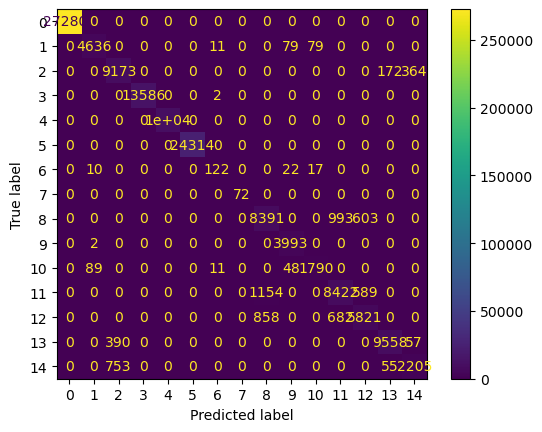

In [26]:
rf_score = rf.score(X_test, y_test)
print("Accuracy of Random Forest model:", rf_score)

rf_predictions = rf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [27]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272800
           1       0.98      0.96      0.97      4805
           2       0.89      0.94      0.92      9709
           3       1.00      1.00      1.00     13588
           4       1.00      1.00      1.00     10012
           5       1.00      1.00      1.00     24314
           6       0.84      0.71      0.77       171
           7       1.00      1.00      1.00        72
           8       0.81      0.84      0.82      9987
           9       0.96      1.00      0.98      3995
          10       0.95      0.92      0.94      1938
          11       0.83      0.83      0.83     10165
          12       0.83      0.79      0.81      7361
          13       0.98      0.96      0.97     10005
          14       0.84      0.73      0.78      3013

    accuracy                           0.98    381935
   macro avg       0.93      0.91      0.92    381935
weighted avg       0.98   

### 2.3 KNN Classifier

In [28]:
# Perform KNN classification on the data
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [29]:
%%time
# Fit the classifier to the training data
knn.fit(X_train, y_train)

CPU times: total: 453 ms
Wall time: 453 ms


KNeighborsClassifier(n_neighbors=7)

In [30]:
# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
knn_predictions = knn.predict(X_test)

# Compute the accuracy of the KNN classifier on the test data
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy of KNN model:", knn_accuracy)

print(classification_report(y_test, knn_predictions))

### 2.4 SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Create an SVM object
svm = SVC(kernel='linear')

In [ ]:

%%time
# Train the SVM on the training data
svm.fit(X_train, y_train)

CPU times: total: 10min 49s
Wall time: 10min 50s


SVC(kernel='linear')

In [ ]:
# Predict the labels of the test data
svm_predications = svm.predict(X_test)

# Compute the accuracy of the SVM on the test data
svm_accuracy = accuracy_score(y_test, svm_predications)
print("Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predications))


Accuracy: 0.7753285151116951
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4820
           1       0.63      0.77      0.69      1973
           2       0.89      0.63      0.74      2099
           3       1.00      0.99      0.99      2619
           4       1.00      0.58      0.73      2049
           5       1.00      1.00      1.00      2900
           6       0.78      0.67      0.72       171
           7       1.00      1.00      1.00        72
           8       0.60      0.25      0.35      1994
           9       0.63      0.99      0.77      1784
          10       0.68      0.49      0.57      1938
          11       0.41      0.82      0.54      2057
          12       0.65      0.37      0.47      2043
          13       0.96      0.86      0.91      2012
          14       0.63      0.90      0.74      1909

    accuracy                           0.78     30440
   macro avg       0.79      0.75      0.75     304

### 2.5 Multi Layer Perception (DNN)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

CPU times: total: 11min 21s
Wall time: 1min 53s


In [ ]:
print("Accuracy of MLP (DNN) model:", mlp_score)


Accuracy of MLP (DNN) model: 0.8241458607095926


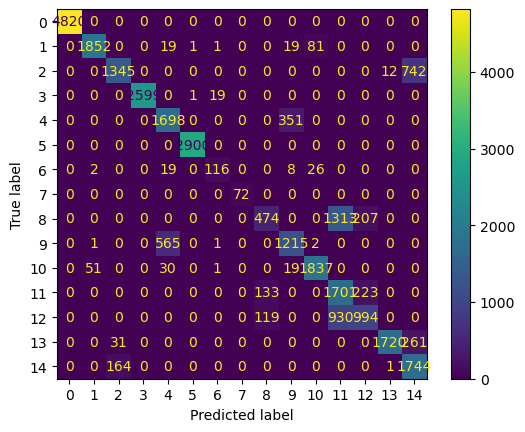

In [ ]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

# print classification report
print("MLP Classification Report: ")
print(classification_report(y_test, mlp_predictions))

Macro: (0.8347116878105465, 0.8018291785435709, 0.802272887702315, None)
Micro: (0.8241458607095926, 0.8241458607095926, 0.8241458607095926, None)
Weighted: (0.8473626718994867, 0.8241458607095926, 0.8204070247574565, None)
Per-label: (array([1.        , 0.97166842, 0.87337662, 1.        , 0.72844273,
       0.99931082, 0.84057971, 1.        , 0.65289256, 0.75372208,
       0.94398767, 0.43128803, 0.69803371, 0.99249856, 0.63487441]), array([1.        , 0.93867207, 0.64078132, 0.9923635 , 0.82869693,
       1.        , 0.67836257, 1.        , 0.23771314, 0.68105381,
       0.94788442, 0.82693243, 0.4865394 , 0.85487078, 0.91356731]), array([1.        , 0.95488528, 0.73921407, 0.99616711, 0.77534247,
       0.99965529, 0.75080906, 1.        , 0.34852941, 0.7155477 ,
       0.94593203, 0.56690552, 0.5734064 , 0.91855808, 0.74914089]), array([4820, 1973, 2099, 2619, 2049, 2900,  171,   72, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
MLP Classification Report: 
        

In [ ]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(74, 100)
(100, 15)
2
(100,)
(15,)
3
<class 'numpy.ndarray'>


### 2.7 Extreme Gradient Boosting

In [ ]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb

In [ ]:
%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)


CPU times: total: 15min 1s
Wall time: 1min 24s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)

# print classification report
xgb_predictions = xgb_classifier.predict(X_test)


Accuracy of XGB model: 0.9483245729303548


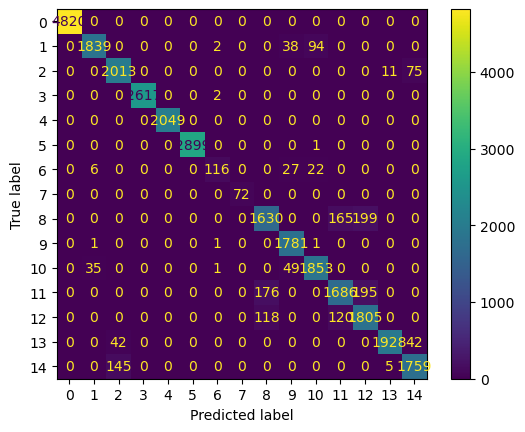

In [ ]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

print("XGB Classification Report: ")
print(classification_report(y_test, xgb_predictions))

Macro: (0.945086125275984, 0.9282064432818211, 0.9348494742212619, None)
Micro: (0.9483245729303548, 0.9483245729303548, 0.9483245729303548, None)
Weighted: (0.9488165404998968, 0.9483245729303548, 0.9481716009992247, None)
Per-label: (array([1.        , 0.97767145, 0.915     , 1.        , 1.        ,
       1.        , 0.95081967, 1.        , 0.84719335, 0.93984169,
       0.94013191, 0.85540335, 0.82082765, 0.99176955, 0.93763326]), array([1.        , 0.93208312, 0.95902811, 0.99923635, 1.        ,
       0.99965517, 0.67836257, 1.        , 0.81745236, 0.99831839,
       0.95614035, 0.81964025, 0.88350465, 0.9582505 , 0.92142483]), array([1.        , 0.95433316, 0.93649686, 0.99961803, 1.        ,
       0.99982756, 0.79180887, 1.        , 0.83205717, 0.96819788,
       0.94806856, 0.83714002, 0.85101367, 0.97472194, 0.92945839]), array([4820, 1973, 2099, 2619, 2049, 2900,  171,   72, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
XGB Classification Report: 
        

# Recap

In [ ]:
print("Accuracy of DT Model::", dt_score)
print("Accuracy of Random Forest model:", rf_score)
print("Accuracy of KNN model:", knn_accuracy)
print("Accuracy of SVM model:", svm_accuracy)
print("Accuracy of MLP (DNN) model:", mlp_score)
print("Accuracy of XGB model:", xgb_score)


Accuracy of DT Model:: 0.9276938239159002
Accuracy of Random Forest model: 0.9300919842312746
Accuracy of KNN model: 0.8103482260183968
Accuracy of SVM model: 0.7753285151116951
Accuracy of MLP (DNN) model: 0.8241458607095926
Accuracy of XGB model: 0.9483245729303548


In [ ]:
DT = 67.11
RF = 80.83
KNN = 79.18
SVM = 77.61
DNN = 94.67

# Calculate and print the difference between the expected values and the actual values
diff_dt = dt_score - DT
diff_rf = rf_score - RF
diff_knn = knn_accuracy - KNN
diff_svm = svm_accuracy - SVM
diff_dnn = mlp_score - DNN

print(f"\nDifference between expected and actual values:\nDT: {diff_dt}\nRF: {diff_rf}\nKNN: {diff_knn}\nSVM: {diff_svm}\nDNN: {diff_dnn}")